In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix

In [3]:
# Load the dataset
customer = pd.read_csv('/content/Customer-Churn.csv')

# View the first few rows
print(customer.head())

# Check for missing values
print(customer.isnull().sum())

# Descriptive statistics
print(customer.describe())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [5]:
# Data Manipulation
#a
print(sum(customer['gender'] == "Male"))

#b
print(sum(customer['InternetService'] == "DSL"))

#c
new_customer = customer[(customer['gender'] == 'Female') &
                        (customer['SeniorCitizen'] == 1) &
                        (customer['PaymentMethod'] == 'Mailed check')]

print(new_customer.head())

#d
customer['TotalCharges'] = pd.to_numeric(customer['TotalCharges'], errors='coerce')
new_customer = customer[(customer['tenure'] < 10) | (customer['TotalCharges'] < 500)]

print(new_customer.head())

3555
2421
     customerID  gender  SeniorCitizen Partner Dependents  tenure  \
139  0390-DCFDQ  Female              1     Yes         No       1   
176  2656-FMOKZ  Female              1      No         No      15   
267  3197-ARFOY  Female              1      No         No      19   
451  5760-WRAHC  Female              1      No         No      22   
470  4933-IKULF  Female              1      No         No      17   

    PhoneService MultipleLines InternetService       OnlineSecurity  ...  \
139          Yes            No     Fiber optic                   No  ...   
176          Yes           Yes     Fiber optic                   No  ...   
267          Yes            No     Fiber optic                  Yes  ...   
451          Yes            No             DSL                  Yes  ...   
470          Yes            No              No  No internet service  ...   

        DeviceProtection          TechSupport          StreamingTV  \
139                   No                   No   

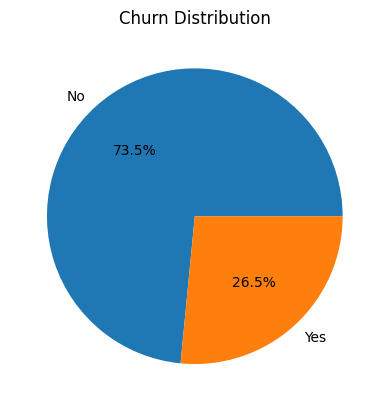

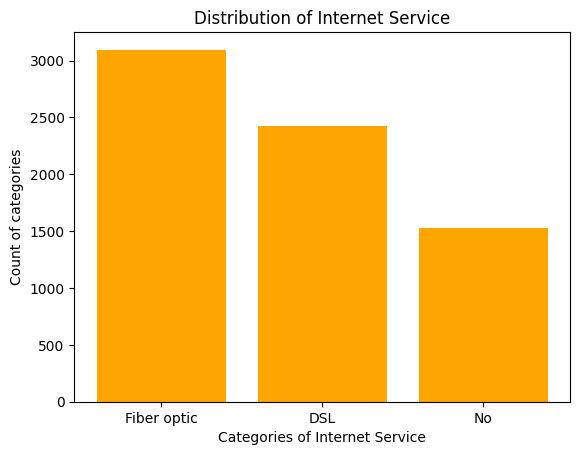

In [6]:
# Data Visualization
#a
names = customer["Churn"].value_counts().index.tolist()
sizes = customer["Churn"].value_counts().tolist()

plt.pie(sizes, labels=names, autopct="%0.1f%%")
plt.title('Churn Distribution')
plt.show()

#b
plt.bar(customer['InternetService'].value_counts().index.tolist(),
        customer['InternetService'].value_counts().tolist(), color='orange')
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of categories')
plt.title('Distribution of Internet Service')
plt.show()

<ipython-input-7-d1ba613b1919>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Churn'] = y['Churn'].map({'Yes': 1, 'No': 0})
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3229 - loss: 0.9150 - val_accuracy: 0.7283 - val_loss: 0.6106
Epoch 2/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7333 - loss: 0.5697 - val_accuracy: 0.7283 - val_loss: 0.5131
Epoch 3/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7285 - loss: 0.5221 - val_accuracy: 0.7283 - val_loss: 0.5125
Epoch 4/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7459 - loss: 0.5045 - val_accuracy: 0.7283 - val_loss: 0.5122
Epoch 5/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7344 - loss: 0.5138 - val_accuracy: 0.7283 - val_loss: 0.5119
Epoch 6/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7414 - loss: 0.5120 - val_accuracy: 0.7283 - val_loss: 0.5115
Epoch 7/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7386 - loss: 0.5153 - val_accuracy: 0.7283 - val_loss: 0.5115
Epoch 8/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7398 - loss: 0.5185 - val_accu

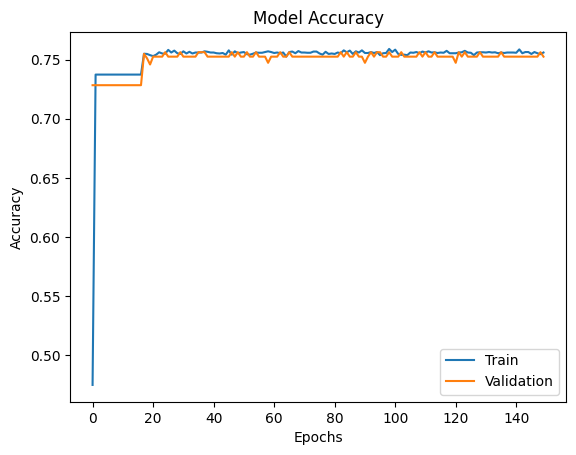

In [7]:
# Model Building

#a
x = customer[['tenure']]
y = customer[['Churn']]

# Convert 'Churn' column to numeric (assuming it's currently string 'Yes'/'No')
y['Churn'] = y['Churn'].map({'Yes': 1, 'No': 0})

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

model = Sequential()
model.add(Dense(12, input_dim=1, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=150, validation_data=(x_test, y_test))

y_pred = (model.predict(x_test) > 0.5).astype(int)
print(confusion_matrix(y_test, y_pred))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4035 - loss: 2.6310 - val_accuracy: 0.7283 - val_loss: 0.5799
Epoch 2/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6483 - loss: 0.8209 - val_accuracy: 0.7283 - val_loss: 0.5154
Epoch 3/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6729 - loss: 0.6856 - val_accuracy: 0.7283 - val_loss: 0.5121
Epoch 4/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6988 - loss: 0.6128 - val_accuracy: 0.7283 - val_loss: 0.5128
Epoch 5/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7034 - loss: 0.5749 - val_accuracy: 0.7283 - val_loss: 0.5129
Epoch 6/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7238 - loss: 0.5587 - val_accuracy: 0.7283 - val_loss: 0.5184
Epoch 7/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7272 - loss: 0.5544 - val_accuracy: 0.7283 - val_loss: 0.5189
Epoch 8/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7231 - loss: 0.5450 - val_accuracy: 0.7283

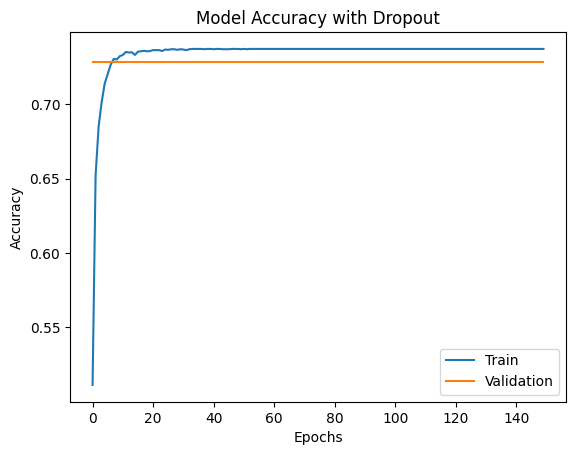

In [8]:
#b
model = Sequential()
model.add(Dense(12, input_dim=1, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=150, validation_data=(x_test, y_test))

y_pred = (model.predict(x_test) > 0.5).astype(int)
print(confusion_matrix(y_test, y_pred))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy with Dropout')
plt.legend(['Train', 'Validation'])
plt.show()

Epoch 1/150


<ipython-input-9-9e16b796a0b2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Churn'] = y['Churn'].map({'Yes': 1, 'No': 0})
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6646 - loss: nan - val_accuracy: 0.7283 - val_loss: nan
Epoch 2/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7367 - loss: nan - val_accuracy: 0.7283 - val_loss: nan
Epoch 3/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7430 - loss: nan - val_accuracy: 0.7283 - val_loss: nan
Epoch 4/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7288 - loss: nan - val_accuracy: 0.7283 - val_loss: nan
Epoch 5/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7426 - loss: nan - val_accuracy: 0.7283 - val_loss: nan
Epoch 6/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7111 - loss: nan - val_accuracy: 0.7283 - val_loss: nan
Epoch 7/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7464 - loss: nan - val_accuracy: 0.7283 - val_loss: nan
Epoch 8/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7493 - loss: nan - val_accuracy: 0.7283 - val_loss: nan
Epoch 9/150
155/155 ━━━━━━━━

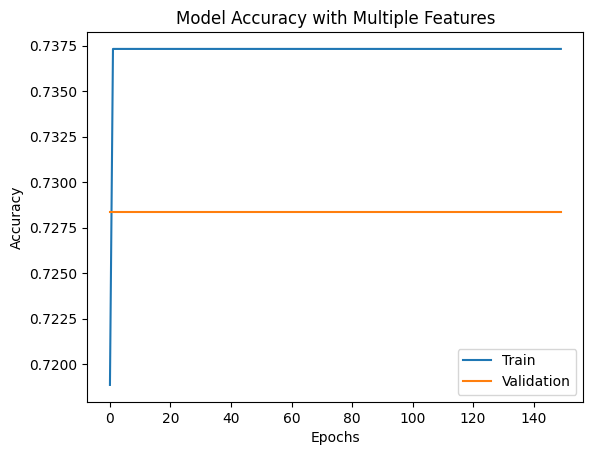

In [9]:
#c
x = customer[['MonthlyCharges', 'tenure', 'TotalCharges']]
y = customer[['Churn']]

# Convert 'Churn' column to numeric (assuming it's currently string 'Yes'/'No')
y['Churn'] = y['Churn'].map({'Yes': 1, 'No': 0})

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

model = Sequential()
model.add(Dense(12, input_dim=3, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=150, validation_data=(x_test, y_test))

y_pred = (model.predict(x_test) > 0.5).astype(int)
print(confusion_matrix(y_test, y_pred))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy with Multiple Features')
plt.legend(['Train', 'Validation'])
plt.show()